# Globe Tossing - A Bayesian Learning Exercise

<br>

## Introduction
Suppose you have a globe representing our planet, the Earth. This version of the world is small enough to hold in your hands. You are curious how much of the surface is covered in water. You adopt the following strategy: You will toss the globe up in the air. When you catch it, you will record whether or not the surface under your right index finger is water or land. Then you toss the globe up in the air again and repeat the procedure. This strategy generates a sequence of samples from the globe. The first nine samples could look like the following sequence: $\mathcal{D} = (W L W W W L W L W)$




## Objective:
In this task, you will implement a Bayesian updating function to estimate the proportion of water on Earth based on sequence of tosses you will generate. You will also create a plot to visualize how the Bayesian model learns and refines its estimate as more data is collected.

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import math

## Instructions:

1. Initialize your prior belief about the proportion $p$ of water on Earth. Represent this belief as a uniform distribution on the interval [0, 1]. You can use the `numpy` library to create an array of 1000 evenly spaced values between 0 and 1, representing potential proportions of water.

In [44]:
# Step 1: Initialize the prior belief

proportions = np.linspace(0, 1, num=1000)

prior = np.ones_like(proportions) / len(proportions)

# print(proportions)

2. Create a function called `likelihood` that takes two arguments: the proportion of water and an observed outcome (either 'W' or 'L'). The function should return the likelihood of observing the outcome given the proportion of water. For example, if the proportion of water is 0.6 and the outcome is 'W', the likelihood is 0.6.

In [45]:
# Step 2: Create the likelihood function

def likelihood(proportion, outcome):
    if outcome == 'W':
        return proportion
    elif outcome == 'L':
        return 1 - proportion 
    else:
        raise ValueError("Please pass a correct outcome!")
        
# print(likelihood(proportions, 'L'))

3. Create a function called `bayesian_update` that takes three arguments: the prior distribution, the proportion of water array, and the observed outcome. The function should perform the Bayesian update by calculating the likelihood of the observed outcome for each proportion in the array, and then multiplying it by the corresponding prior value. Normalize the resulting distribution so that it sums to 1. This normalized distribution is your new posterior distribution.

In [46]:
# Step 3: Create the bayesian_update function


def bayesian_update(prior, proportions, outcome):
    likelihoods = likelihood(proportions, outcome)
    posterior = prior * likelihoods
    posterior /= np.sum(posterior)
    return posterior

# print(bayesian_update(prior, proportions, 'W'))

4. Simulate a series of globe tosses with a known true proportion of water. You can use the `numpy random.choice` function to generate random outcomes ('W' or 'L') based on the true proportion. For this exercise, let's assume the true proportion of water is 0.71. Generate 9 toss outcomes.


In [47]:
# Step 4: Simulate globe tosses

true_proportion = 0.71
toss_outcomes =  np.random.choice(['W','L'], size = 9, p = [true_proportion, 1 - true_proportion])
# print(toss_outcomes)


5. Update your prior belief iteratively using the `bayesian_update` function and the observed outcomes. Perform the updates after every toss and store the resulting posterior distributions.

In [48]:
# Step 5: Update prior belief iteratively and store posterior distributions

posteriors = []
posteriors.append(prior)
for outcome in toss_outcomes:
    posterior = bayesian_update(posteriors[-1], proportions, outcome)
    posteriors.append(posterior)
# toss_sequences = []
# print(posteriors)

6. Create a plot to visualize how the Bayesian model learns and refines its estimate as more data is collected. On the x-axis, show the proportion of water, and on the y-axis, show the plausibility (probability density) of each proportion. Plot the prior distribution and the posterior distributions after each toss.

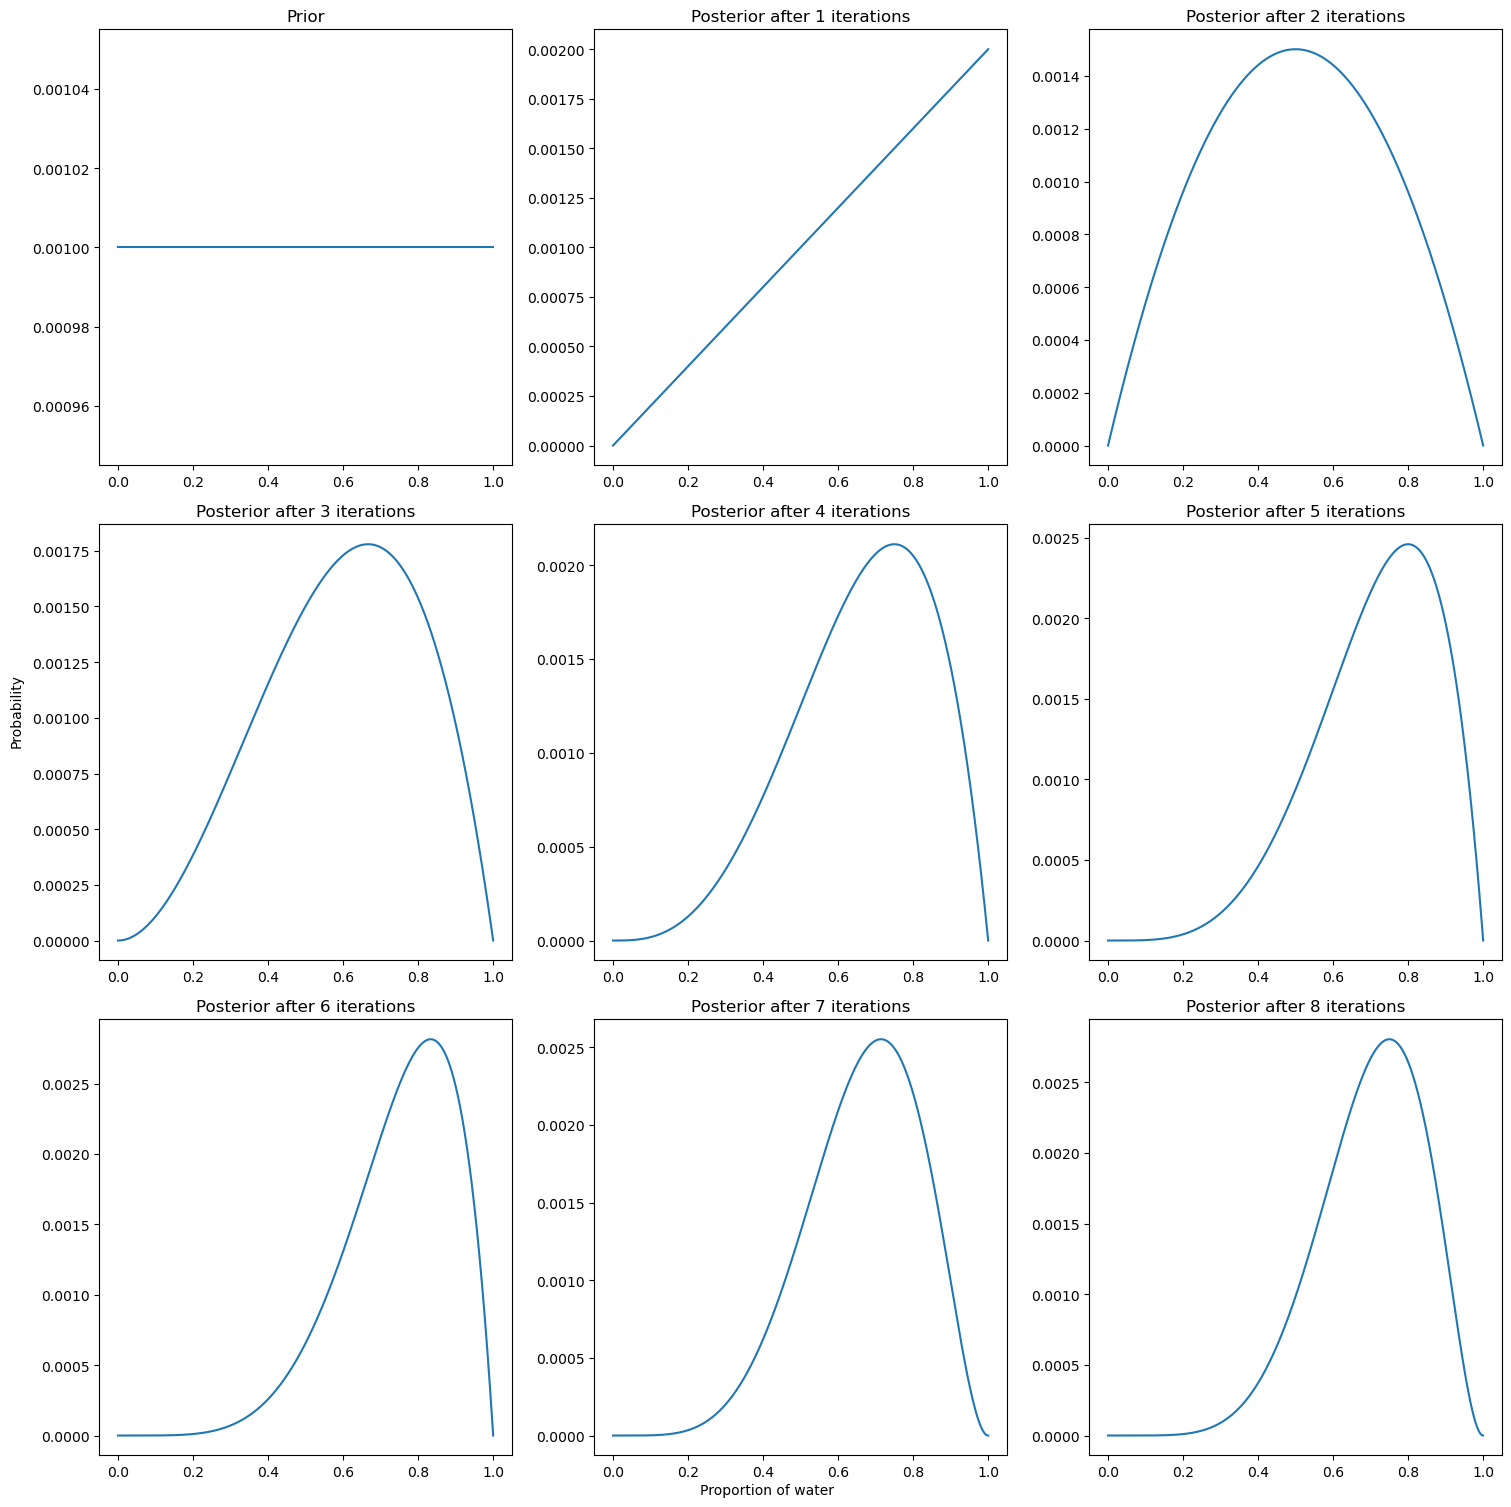

In [49]:
# Step 6: Plot the learning process in a grid of plots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

axes[0].plot(proportions, prior)
axes[0].set_title('Prior')

for i in range(len(toss_outcomes)):
    if i >= 1:
        axes[i].plot(proportions, posteriors[i])
        axes[i].set_title(F'Posterior after {i} iterations')
    else:
        continue
    
fig.text(0.5, 0.00005, 'Proportion of water', ha = 'center')
fig.text(0.00005, 0.5, 'Probability', ha = 'center', rotation = 'vertical')
    

plt.tight_layout()
plt.show()

# Sentiment Analysis - A Naive Bayes Exercise

## Theoretical Understanding
Consider a document classification problem, where you are given a dataset of text documents with their corresponding categories. You are asked to classify new documents into one of the given categories using the Naive Bayes classifier.

1. Explain the Naive Bayes assumption in the context of document classification. Why is this assumption considered "naive"?<br>
<br>
The Naive Bayes assumption means that each word in a document is independent of all the other words in the document, and the probability of a particular word occurring in a document is calculated independently of the other words in the document. 

2. Write the formula for the Naive Bayes classifier in terms of the likelihood, prior, and posterior probabilities, and explain each term's meaning.<br>
<br>
Bayes' theorem:
$$P(y|\boldsymbol{x}) = \frac{P(\boldsymbol{x}|y)P(y)}{P(\boldsymbol{x})}$$

likelihood: $P(\boldsymbol{x}|y)$ observing the feature $\boldsymbol{x}$ given class in the new document;<br>
posterrior: $P(y|\boldsymbol{x})$; <br>
prior: $P(y)$;<br>

<br>

Naive assumption:
$$P(\boldsymbol{x}|y) = \prod_{i=1}^{N}P(x_{i}|y)$$

If we assume 0/1 loss function then we get a MAP(Max A Posterior) classifier:
$$ \hat{y} = argmax_{y}P(y|\boldsymbol{x}) = argmax_{y}P(\boldsymbol{x}|y)P(y) $$

3. Discuss how the Naive Bayes classifier handles cases where some words in a new document are not present in the training data. Explain the concept of "smoothing" and how it helps in this situation.<br>
<br>
For the Naive Bayes classifier it is not allowed because the likelihood of some class becomes zero then the posterior becomes zero as well.
<br>
Smoothing is used to overcome this problem, which is to assign a value to the word that has not been observed in the training data. We can just add "1" to the number of each word in the whole wordlist.

## Implementation

Implement a Naive Bayes classifier in Python to classify documents into one of two categories: "positive" or "negative." You are given a training dataset of movie reviews and their corresponding labels (either "positive" or "negative").

Your dataset consists of (input,output) pairs with the following shape:

(document, label) = (movie_review, positive/negative)

### Preprocessing the data
Write a function `preprocess(document)` that takes a single document as input and returns a list of words after tokenization, lowercase conversion, and removal of punctuation and stop words.

In [135]:
# Preprocess the document
def preprocess(document):
    stop_words = {"a", "an", "and", "are", "as", "at", "be", "by", "for", "from", "has", "he", \
                  "in", "is", "it", "its", "of", "on", "that", "the", "to", "was", "were", "will", "with"}
    symbols = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    
    words = document
    for each in document:
        if each in symbols:
            words = words.replace(each, '')
    words = words.lower()   
    words = words.split();
    # print(F"word1{words}")
    
    postWords = []
    for each in words:
        if each not in stop_words:
            postWords.append(each)
    return postWords

# print(preprocess('This movie are was an masterpiece with a fantastic plot and great acting'))

### Implementing a Naive Bayes classifier
Write a function `train(training_data)` that takes the training dataset as input and returns a dictionary containing the prior probabilities for each class and the likelihoods for each word given each class. Apply Laplace smoothing with $α=1$.

In [137]:
# Train the Naive Bayes model


def train(training_data):
    smoothAlpha = 1;
    countLabel = defaultdict(int)
    countWord = defaultdict(lambda: defaultdict(int))
    wordList = set()
    wordsLabel = defaultdict(int)
    
    
    for each in training_data:
        countLabel[each[1]] += 1 
        
        for word in preprocess(each[0]):
            countWord[each[1]][word] += 1
            wordList.add(word)
            wordsLabel[each[1]] += 1
    # print(F"countLabel {countLabel}")
    total = len(training_data)
    # print(F"prior: {countLabel}")
    prior = {"positive" : countLabel["positive"]/total, "negative": countLabel["negative"]/total}
    
    likelihood = defaultdict(lambda: defaultdict(float))
    for label in countLabel.keys():
        for word in wordList:
            likelihood[label][word] = (countWord[label][word] + smoothAlpha)/(wordsLabel[label] + len(wordList))
    
    model = {'priors': prior, 'likelihoods': likelihood, "wordsLabel" : wordsLabel, "sumWords": len(wordList)}                                                                          
    return model


# training_data = [
#     ("I absolutely loved this movie! The acting was superb.", "positive"),
#     ("The movie had a great plot and fantastic performances.", "positive"),
#     ("This is one of the best movies I have ever seen.", "positive"),
#     ("I found this movie to be boring and uninspired.", "negative"),
#     ("The plot was predictable, and the acting was mediocre.", "negative"),
#     ("This movie was a complete waste of time.", "negative")]

# print(F"result: {train(training_data)}")

Write a function `classify(document, model)` that takes a document and the model (dictionary) returned by the `train()` function as input and returns the predicted class ("positive" or "negative") for the given document.

In [138]:
# Classify a document using the Naive Bayes model


def classify(document, model):
    smoothAlpha = 1;
    words = preprocess(document)
    logPosterior = {"positive": 0, "negative": 0}
    for each in model['priors']:
        logPosterior[each] = math.log(model['priors'][each])
    for word in words:
        for each in model['likelihoods']:
            if word in model['likelihoods'][each]:
                logPosterior[each] += math.log(model['likelihoods'][each][word])
            else:
                logPosterior[each] += math.log(smoothAlpha/(model['wordsLabel'][each] + model['sumWords']))
    return max(logPosterior, key = lambda k: logPosterior[k])
#     for word in words:
#         for 
#     return predicted_class

training_data = [
    ("I absolutely loved this movie! The acting was superb.", "positive"),
    ("The movie had a great plot and fantastic performances.", "positive"),
    ("This is one of the best movies I have ever seen.", "positive"),
    ("I found this movie to be boring and uninspired.", "negative"),
    ("The plot was predictable, and the acting was mediocre.", "negative"),
    ("This movie was a complete waste of time.", "negative")]
model = train(training_data)

# print(classify("I ss= | ==?! you on ML", model))

negative


Test your implementation using the small dataset of movie reviews provided below, and provide the classification results for a few example reviews.

In [139]:
# Test the Naive Bayes model
training_data = [
    ("I absolutely loved this movie! The acting was superb.", "positive"),
    ("The movie had a great plot and fantastic performances.", "positive"),
    ("This is one of the best movies I have ever seen.", "positive"),
    ("The cinematography was amazing, and the story was captivating.", "positive"),
    ("This movie is an all-time favorite of mine.", "positive"),
    ("The acting and direction were top-notch.", "positive"),
    ("This film was a wonderful blend of humor and drama.", "positive"),
    ("The story was original and the characters were well-developed.", "positive"),
    ("A must-watch movie for everyone!", "positive"),
    ("The visual effects were stunning, and the soundtrack was perfect.", "positive"),
    ("Incredible performances by the entire cast.", "positive"),
    ("A heartwarming and inspiring story.", "positive"),
    ("An unforgettable cinematic experience.", "positive"),
    ("The movie had me on the edge of my seat!", "positive"),
    ("A thrilling and emotional rollercoaster.", "positive"),
    ("I can't stop thinking about how good this movie was.", "positive"),
    ("A timeless classic that I'll watch again and again.", "positive"),
    ("The movie was charming and full of surprises.", "positive"),
    ("The plot twists kept me guessing until the very end.", "positive"),
    ("An excellent adaptation of the book.", "positive"),
    ("I found this movie to be boring and uninspired.", "negative"),
    ("The plot was predictable, and the acting was mediocre.", "negative"),
    ("This movie was a complete waste of time.", "negative"),
    ("The characters were unlikable, and the story was dull.", "negative"),
    ("I can't believe I wasted two hours of my life watching this.", "negative"),
    ("The special effects were laughable, and the acting was wooden.", "negative"),
    ("I have never been so disappointed by a movie in my life.", "negative"),
    ("The dialogue was cheesy, and the storyline was confusing.", "negative"),
    ("The movie had no redeeming qualities whatsoever.", "negative"),
    ("The acting was terrible, and the plot made no sense.", "negative"),
    ("This film was a mess from start to finish.", "negative"),
    ("I would not recommend this movie to anyone.", "negative"),
    ("I walked out of the theater halfway through the movie.", "negative"),
    ("A lackluster performance by the lead actor.", "negative"),
    ("I couldn't wait for this movie to end.", "negative"),
    ("The movie tried too hard to be funny, but it just wasn't.", "negative"),
    ("I was so disappointed with the ending.", "negative"),
    ("The movie was extremely slow-paced and uneventful.", "negative"),
    ("Poorly written and poorly executed.", "negative"),
    ("The movie was forgettable and not worth watching.", "negative"),
]

model = train(training_data)
# print(F"model: {model}")

result = []

test_reviews = [
    (
        "This movie was a masterpiece with a fantastic plot and great acting!",
        "positive",
    ),
    ("I didn't enjoy this movie at all. It was boring and predictable.", "negative"),
]

for each in test_reviews:
    result.append(classify(each[0], model))
    
print(result)
    

['positive', 'negative']


Comment on the performance of your model, any potential pitfalls or things you could implement to improve it? Keep your answer short. <br>
<br>
The assumption of the naive is not realistic, and the dataset is not large enough. To improve the performance, we have to train the model over a larger dataset, apply different smoothing technique or even estimate a more realistic likelihood.

#SOL